<a href="https://colab.research.google.com/github/sanjeev-project/vanadium-flow-battery-project/blob/main/project_vanadium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
data = pd.read_csv("/content/dataset_1_processed.csv")

In [72]:
data.head()

,test_name_carbon,felt_type,carbon_felt_thickness_mm,carbon_felt_price_$/m2,electrode_area_m2/cell,cell_number,carbon_felt_price_$,negative_electrode/bipolar_plate_structure_mm,postive_electrode/bipol ar_plate_structure_mm,electrode/bipolar_plate_structure_price_$/m2,...,CE_%,VE_%,EE_%,UE_%,discharge_energy_Wh,power_cost_$,energy cost_$,total_cost_$,ln(P-cost-26),ln(E-cost-80)
0,VFB 20190322-1,CF Type 1,4.2,48.59,0.094,30,274.06,3.8,3.8,49.24,...,99.23,81.39,80.76,46.95,1752.07,63.358,270.103,333.461,3.57,5.25
1,VFB 20190322-2,CF Type 1,4.2,48.59,0.094,30,274.06,3.8,3.8,49.24,...,98.02,81.25,79.64,42.09,1574.80,63.214,300.507,363.722,3.56,5.40
2,VFB 20190321,CF Type 1,4.2,48.59,0.094,30,274.06,3.8,3.8,49.24,...,99.32,81.02,80.46,47.05,1748.33,63.652,270.681,334.333,3.57,5.25
3,VFB 20190416,CF Type 1,4.2,48.59,0.094,30,274.06,3.8,3.8,49.24,...,98.95,81.99,81.13,45.28,1819.91,65.548,278.609,344.157,3.63,5.29
4,VFB 20190415,CF Type 1,4.2,48.59,0.094,30,274.06,3.8,3.8,49.24,...,99.05,81.09,80.32,43.92,1750.51,63.566,289.654,353.220,3.57,5.35


In [73]:
print(data.columns)

Index(['test_name_carbon ', 'felt_type', 'carbon_felt_thickness_mm',
       'carbon_felt_price_$/m2', 'electrode_area_m2/cell', 'cell_number',
       'carbon_felt_price_$', 'negative_electrode/bipolar_plate_structure_mm',
       'postive_electrode/bipol ar_plate_structure_mm',
       'electrode/bipolar_plate_structure_price_$/m2',
       'electrode_bipolar_plate_structure_price_$', 'bipolar_plate_type',
       'bipolar_plate_pric_$/m2', 'bipolar_plate_area_m2/per cell',
       'bipolar_plate_price_$', 'end_plate_type', 'end_plate_price_$',
       'seal_type', 'seal_price_$/cell', 'seal_price_$', 'membrane_type',
       'membrane_price_$/m2', 'membrane_area_m2', 'membrane_price_$',
       'flow_field_type', 'frame_price_$', 'stack_price_$',
       'electrolyte_concentration_mol/L', 'electrolyte_price_$/L',
       'electrolyte_volume_L', 'electrolyte_price_$', 'compression_ratio',
       'charging_cutoff_voltage _V/Cell', 'current_density', 'power', 'CE_%',
       'VE_%', 'EE_%', 'UE_%',

In [74]:
num_col_db = data._get_numeric_data()
num_col_data = data._get_numeric_data().columns
num_col_db

,carbon_felt_thickness_mm,carbon_felt_price_$/m2,electrode_area_m2/cell,cell_number,carbon_felt_price_$,negative_electrode/bipolar_plate_structure_mm,postive_electrode/bipol ar_plate_structure_mm,electrode/bipolar_plate_structure_price_$/m2,electrode_bipolar_plate_structure_price_$,bipolar_plate_pric_$/m2,...,CE_%,VE_%,EE_%,UE_%,discharge_energy_Wh,power_cost_$,energy cost_$,total_cost_$,ln(P-cost-26),ln(E-cost-80)
0,4.2,48.59,0.094,30,274.06,3.8,3.8,49.24,138.86,16.90,...,99.23,81.39,80.76,46.95,1752.07,63.358,270.103,333.461,3.57,5.25
1,4.2,48.59,0.094,30,274.06,3.8,3.8,49.24,138.86,16.90,...,98.02,81.25,79.64,42.09,1574.80,63.214,300.507,363.722,3.56,5.40
2,4.2,48.59,0.094,30,274.06,3.8,3.8,49.24,138.86,16.90,...,99.32,81.02,80.46,47.05,1748.33,63.652,270.681,334.333,3.57,5.25
3,4.2,48.59,0.094,30,274.06,3.8,3.8,49.24,138.86,16.90,...,98.95,81.99,81.13,45.28,1819.91,65.548,278.609,344.157,3.63,5.29
4,4.2,48.59,0.094,30,274.06,3.8,3.8,49.24,138.86,16.90,...,99.05,81.09,80.32,43.92,1750.51,63.566,289.654,353.220,3.57,5.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,4.4,50.70,0.094,5,47.66,3.8,3.8,49.24,23.14,140.85,...,99.25,80.22,79.62,38.36,404.43,124.860,334.329,459.188,4.57,5.54
307,4.4,50.70,0.094,5,47.66,3.8,3.8,49.24,23.14,140.85,...,99.24,80.21,79.60,38.20,402.74,124.870,335.732,460.602,4.57,5.54
308,4.4,50.70,0.094,5,47.66,3.8,3.8,49.24,23.14,140.85,...,99.23,80.37,79.75,44.78,477.35,123.515,283.255,406.770,4.56,5.31
309,4.4,50.70,0.094,5,47.66,3.8,3.8,49.24,23.14,140.85,...,99.16,80.33,79.66,44.49,474.18,123.528,285.146,408.675,4.56,5.32


In [75]:
cat_col_data = data.drop(num_col_data, axis=1)

In [76]:
one_hot_encoding_data = pd.get_dummies(cat_col_data, cat_col_data.columns, drop_first=True)
print(one_hot_encoding_data)

     test_name_carbon _VFB 20181229  test_name_carbon _VFB 20181229        \
0                             False                                 False   
1                             False                                 False   
2                             False                                 False   
3                             False                                 False   
4                             False                                 False   
..                              ...                                   ...   
306                           False                                 False   
307                           False                                 False   
308                           False                                 False   
309                           False                                 False   
310                           False                                 False   

     test_name_carbon _VFB 20190110  test_name_carbon _VFB 20190123  \
0   

In [77]:
new_db = pd.concat([one_hot_encoding_data, num_col_db], axis=1)
new_db

,test_name_carbon _VFB 20181229,test_name_carbon _VFB 20181229,test_name_carbon _VFB 20190110,test_name_carbon _VFB 20190123,test_name_carbon _VFB 20190126,test_name_carbon _VFB 20190129,test_name_carbon _VFB 20190225,test_name_carbon _VFB 20190306,test_name_carbon _VFB 20190321,test_name_carbon _VFB 20190322-1,...,CE_%,VE_%,EE_%,UE_%,discharge_energy_Wh,power_cost_$,energy cost_$,total_cost_$,ln(P-cost-26),ln(E-cost-80)
0,False,False,False,False,False,False,False,False,False,True,...,99.23,81.39,80.76,46.95,1752.07,63.358,270.103,333.461,3.57,5.25
1,False,False,False,False,False,False,False,False,False,False,...,98.02,81.25,79.64,42.09,1574.80,63.214,300.507,363.722,3.56,5.40
2,False,False,False,False,False,False,False,False,True,False,...,99.32,81.02,80.46,47.05,1748.33,63.652,270.681,334.333,3.57,5.25
3,False,False,False,False,False,False,False,False,False,False,...,98.95,81.99,81.13,45.28,1819.91,65.548,278.609,344.157,3.63,5.29
4,False,False,False,False,False,False,False,False,False,False,...,99.05,81.09,80.32,43.92,1750.51,63.566,289.654,353.220,3.57,5.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,False,False,False,False,False,False,False,False,False,False,...,99.25,80.22,79.62,38.36,404.43,124.860,334.329,459.188,4.57,5.54
307,False,False,False,False,False,False,False,False,False,False,...,99.24,80.21,79.60,38.20,402.74,124.870,335.732,460.602,4.57,5.54
308,False,False,False,False,False,False,False,False,False,False,...,99.23,80.37,79.75,44.78,477.35,123.515,283.255,406.770,4.56,5.31
309,False,False,False,False,False,False,False,False,False,False,...,99.16,80.33,79.66,44.49,474.18,123.528,285.146,408.675,4.56,5.32


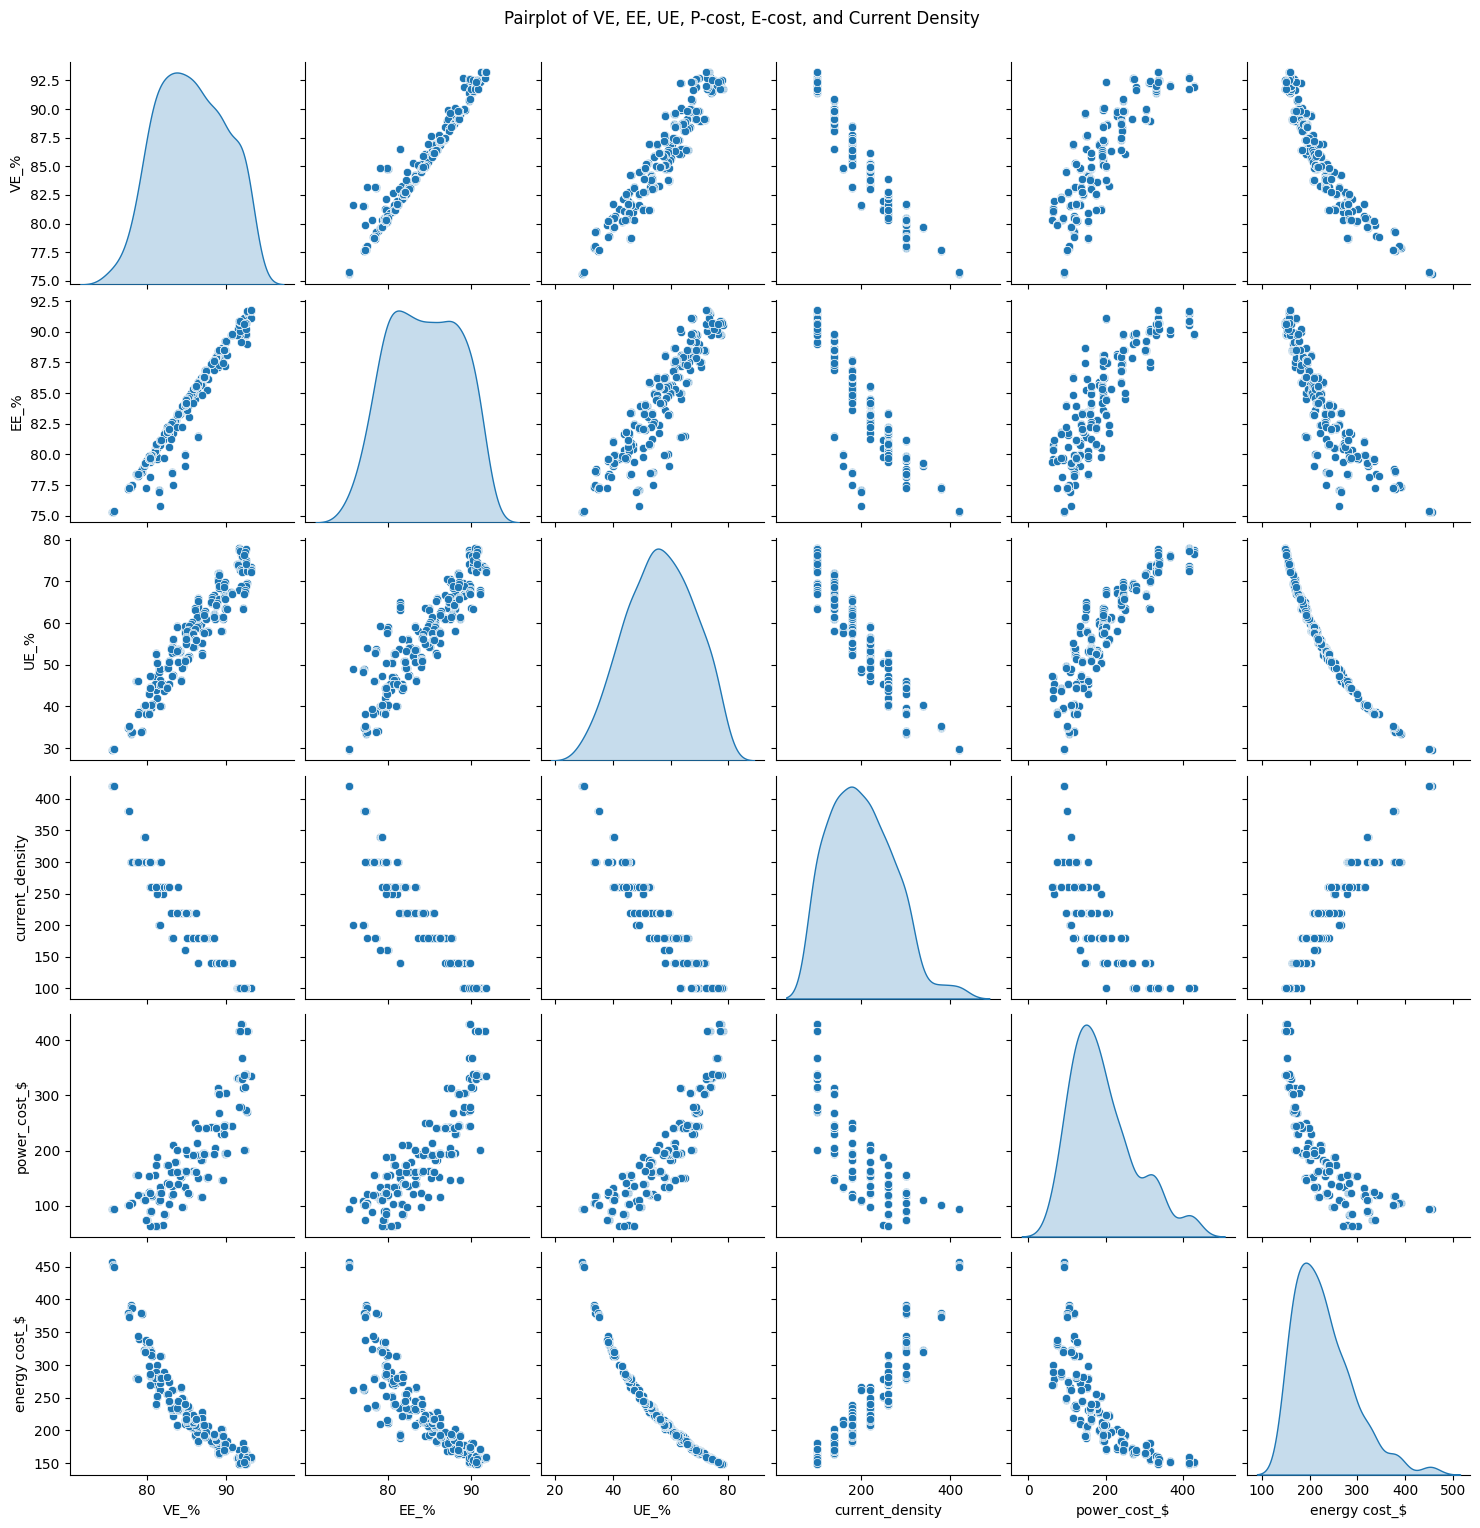

In [78]:

cols_to_plot = ['VE_%', 'EE_%', 'UE_%', 'current_density', 'power_cost_$', 'energy cost_$']

# Create a pairplot to visualize relationships between the variables
sns.pairplot(new_db[cols_to_plot], diag_kind='kde')

# Add a title
plt.suptitle('Pairplot of VE, EE, UE, P-cost, E-cost, and Current Density', y=1.02)

# Show the plot
plt.grid(True)
plt.show()


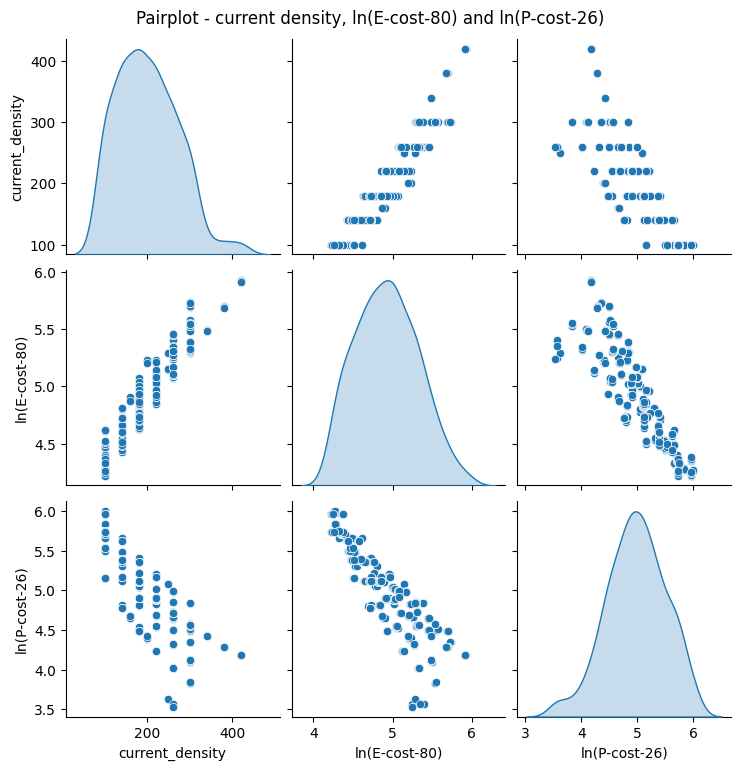

In [79]:
cols_to_plot_1 = ['current_density', 'ln(E-cost-80)', 'ln(P-cost-26)']

# Create a pairplot to visualize relationships between the variables
sns.pairplot(new_db[cols_to_plot_1], diag_kind='kde')

# Add a title
plt.suptitle('Pairplot - current density, ln(E-cost-80) and ln(P-cost-26)', y=1.02)

# Show the plot
plt.grid(True)
plt.show()


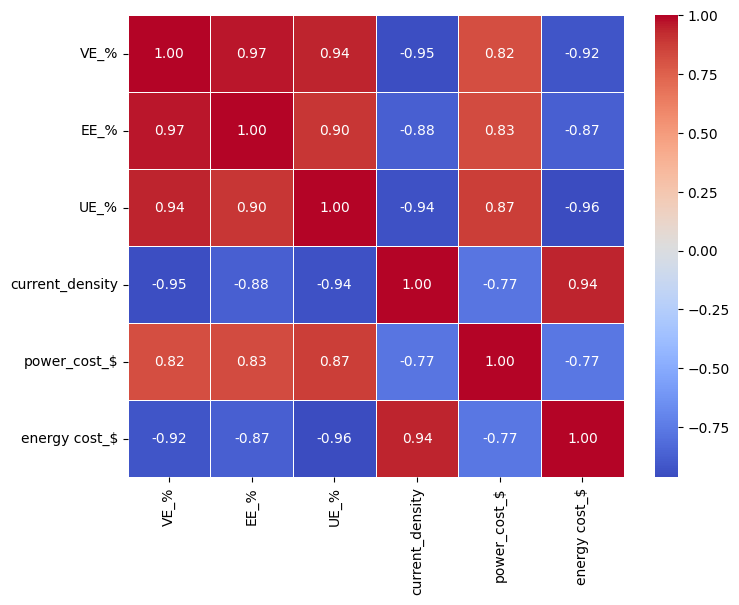

In [80]:
db_corr = new_db[cols_to_plot]
corr_matrix = db_corr.corr(method='pearson')
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [81]:
from sklearn.model_selection import train_test_split
X = new_db.drop(columns=['VE_%', 'EE_%', 'UE_%', 'power_cost_$', 'energy cost_$', 'total_cost_$'])
y = new_db[['VE_%', 'EE_%', 'UE_%', 'power_cost_$', 'energy cost_$', 'total_cost_$']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")

Training set size: (233, 57), Testing set size: (78, 57)


In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')  # MSE for each target
r2 = r2_score(y_test, y_pred, multioutput='raw_values')  # R-squared for each target
print(mse, r2)

[4.85464259e+15 5.76937367e+15 1.89796442e+16 1.88416825e+19
 7.46014132e+17 1.20893413e+19] [-2.46566809e+14 -3.03535125e+14 -1.46819049e+14 -2.37038770e+15
 -2.11850728e+14 -3.74421541e+15]


In [83]:
print(y_pred)

[[ 8.72299796e+01  8.62714314e+01  6.27012258e+01  2.00842087e+02
   1.84738070e+02  3.85489700e+02]
 [ 8.15845933e+01  7.69660561e+01  4.85101888e+01  1.13327950e+02
   2.71481503e+02  3.84899445e+02]
 [ 8.92937819e+01  8.79514805e+01  5.85782609e+01  2.38608963e+02
   2.06781763e+02  4.45740463e+02]
 [ 9.19490223e+01  8.99650881e+01  6.42248402e+01  3.24094246e+02
   2.02312695e+02  5.26772430e+02]
 [ 8.14913121e+01  8.07431135e+01  5.06768122e+01  1.74608459e+02
   2.49633270e+02  4.24594933e+02]
 [ 8.17449864e+01  8.10330275e+01  4.66108341e+01  1.20900391e+02
   2.77218815e+02  3.98428558e+02]
 [ 8.02244008e+01  7.79618406e+01  4.00247130e+01  9.72706909e+01
   3.35929129e+02  4.33428726e+02]
 [ 8.69536444e+01  8.62767057e+01  5.50752985e+01  1.12588081e+02
   2.15816971e+02  3.28202309e+02]
 [ 9.35489007e+01  9.21152112e+01  7.28516710e+01  3.28385559e+02
   1.62620649e+02  4.90944519e+02]
 [ 7.94170830e+01  7.88103675e+01  3.33102341e+01  1.17928902e+02
   3.67331545e+02  4.8554

In [84]:
y_test.head()

,VE_%,EE_%,UE_%,power_cost_$,energy cost_$,total_cost_$
290,87.30,86.34,62.86,194.222,190.390,384.612
9,81.52,76.97,48.17,109.223,266.178,375.402
57,89.47,88.13,58.18,229.101,201.823,430.924
60,92.23,90.23,63.33,313.966,181.461,495.427
25,81.28,80.55,50.55,188.074,251.530,439.604


In [85]:
y_pred_df = pd.DataFrame(y_pred, columns=['VE_%', 'EE_%', 'UE_%', 'power_cost_$', 'energy cost_$', 'total_cost_$'])

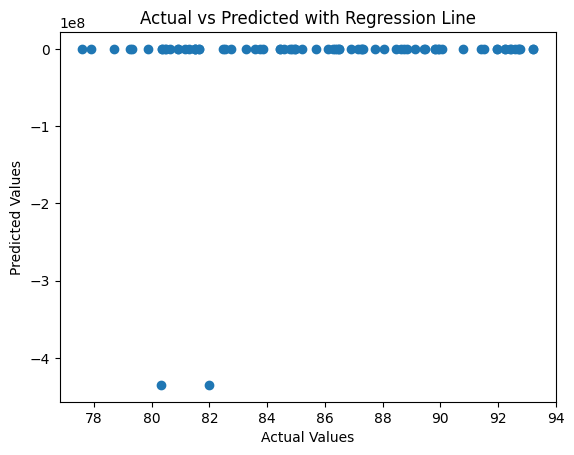

In [86]:

plt.plot(y_test['VE_%'], y_pred_df['VE_%'], 'o')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted with Regression Line')
plt.show()

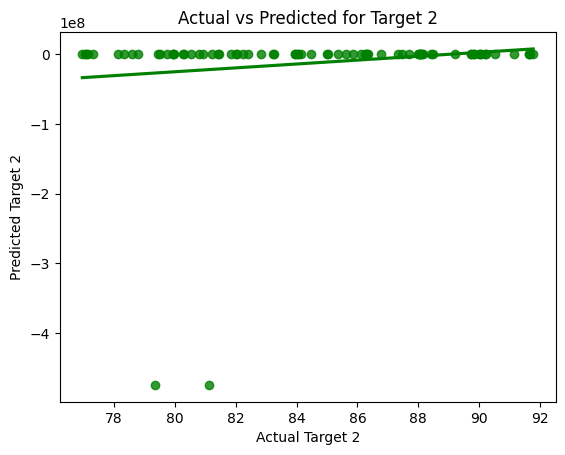

In [87]:
sns.regplot(x=y_test['EE_%'], y=y_pred_df['EE_%'], ci=None, color='green', marker='o')
plt.xlabel('Actual Target 2')
plt.ylabel('Predicted Target 2')
plt.title('Actual vs Predicted for Target 2')
plt.show()

In [88]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

# 1. Ridge (L2 regularization)
ridge_model = Ridge(alpha=1.0)  # You can change alpha to control the strength of regularization

# 2. Lasso (L1 regularization)
# lasso_model = Lasso(alpha=1.0)  # Uncomment this for Lasso

# 3. ElasticNet (L1 + L2 regularization)
# elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # Uncomment this for ElasticNet

ridge_model.fit(X_train, y_train)
y_pred_reg = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_reg, multioutput='raw_values')  # MSE for each target
r2 = r2_score(y_test, y_pred_reg, multioutput='raw_values')  # R-squared for each target
print(mse, r2)

[1.26063920e-01 1.18421945e-01 9.62254328e-01 5.01976747e+02
 1.34005554e+02 9.97827442e+02] [0.99359723 0.99376965 0.99255638 0.93684855 0.96194553 0.69096076]


In [89]:
y_pred_reg

array([[ 87.5654058 ,  86.58363825,  62.12349351, 217.37875413,
        198.70016581, 416.07882235],
       [ 81.85746147,  77.21063667,  49.55600107,  89.9395426 ,
        251.3704517 , 341.31000368],
       [ 89.15298038,  87.82579004,  58.34892544, 233.08652988,
        204.56170159, 437.64835828],
       [ 91.76615319,  89.81380566,  64.3311758 , 292.02895193,
        183.01756955, 475.04673383],
       [ 81.62226444,  80.88069192,  50.84979197, 191.02886529,
        257.9358451 , 448.9649195 ],
       [ 81.78877673,  81.07429976,  46.73278512, 122.80151548,
        277.12356561, 399.92530608],
       [ 80.5778637 ,  78.27134102,  41.53685025,  78.89503634,
        313.01726634, 391.91228479],
       [ 86.93977083,  86.25396784,  55.04447992, 120.86273582,
        221.05558089, 341.91837015],
       [ 93.80195035,  92.35030021,  74.04980176, 307.88146291,
        143.50446757, 451.3859461 ],
       [ 79.48685606,  78.87248325,  34.38619653,  97.83754179,
        347.3761546 , 445.2

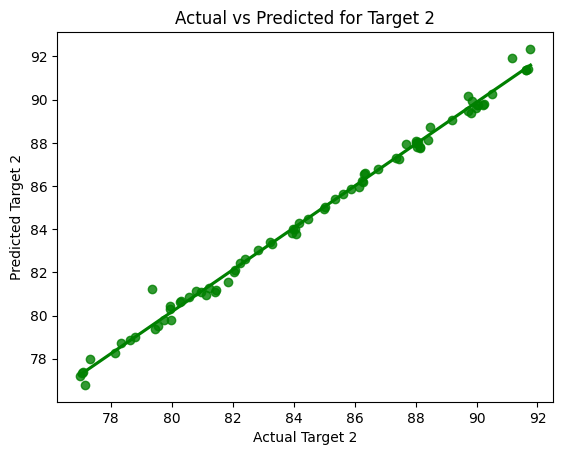

In [90]:
y_pred_reg_df = pd.DataFrame(y_pred_reg, columns=['VE_%', 'EE_%', 'UE_%', 'power_cost_$', 'energy cost_$', 'total_cost_$'])

sns.regplot(x=y_test['EE_%'], y=y_pred_reg_df['EE_%'], ci=None, color='green', marker='o')
plt.xlabel('Actual Target 2')
plt.ylabel('Predicted Target 2')
plt.title('Actual vs Predicted for Target 2')
plt.show()


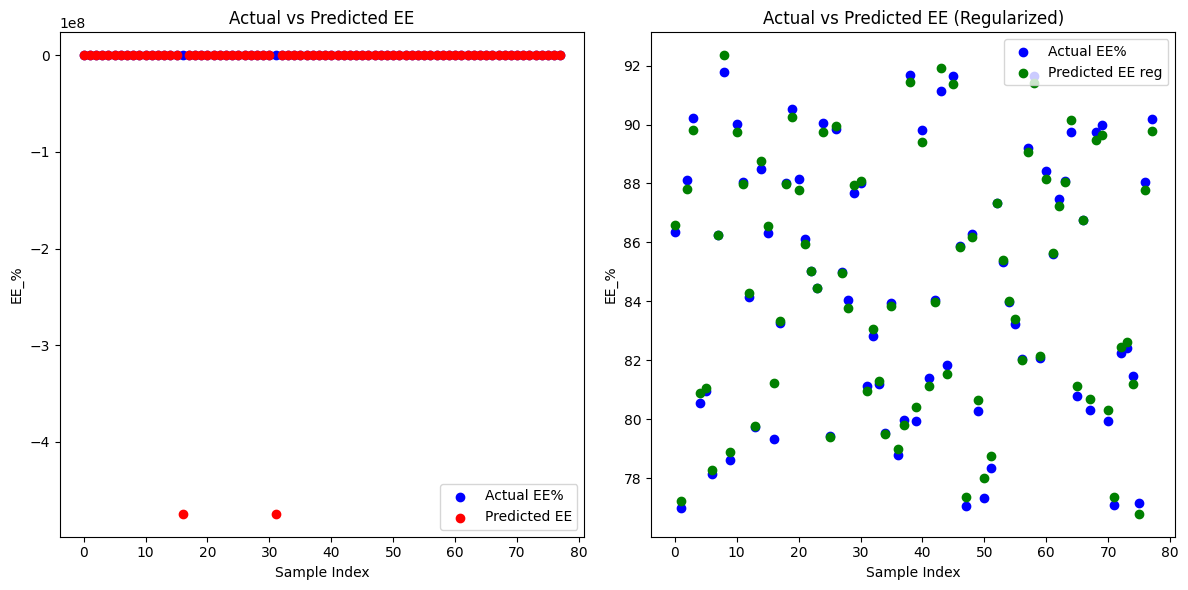

In [91]:
plt.figure(figsize=(12, 6))

# Plot 1: Actual vs Predicted EE
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.scatter(range(len(y_test)), y_test['EE_%'], color='blue', label='Actual EE%')
plt.scatter(range(len(y_pred)), y_pred_df['EE_%'], color='red', label='Predicted EE')
plt.xlabel('Sample Index')
plt.ylabel('EE_%')
plt.title('Actual vs Predicted EE')
plt.legend()

# Plot 2: Actual vs Predicted EE (with Regularization)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.scatter(range(len(y_test)), y_test['EE_%'], color='blue', label='Actual EE%')
plt.scatter(range(len(y_pred)), y_pred_reg_df['EE_%'], color='green', label='Predicted EE reg')
plt.xlabel('Sample Index')
plt.ylabel('EE_%')
plt.title('Actual vs Predicted EE (Regularized)')
plt.legend()

# Show the plots
plt.tight_layout()  # Adjust layout to make space for the plots
plt.show()

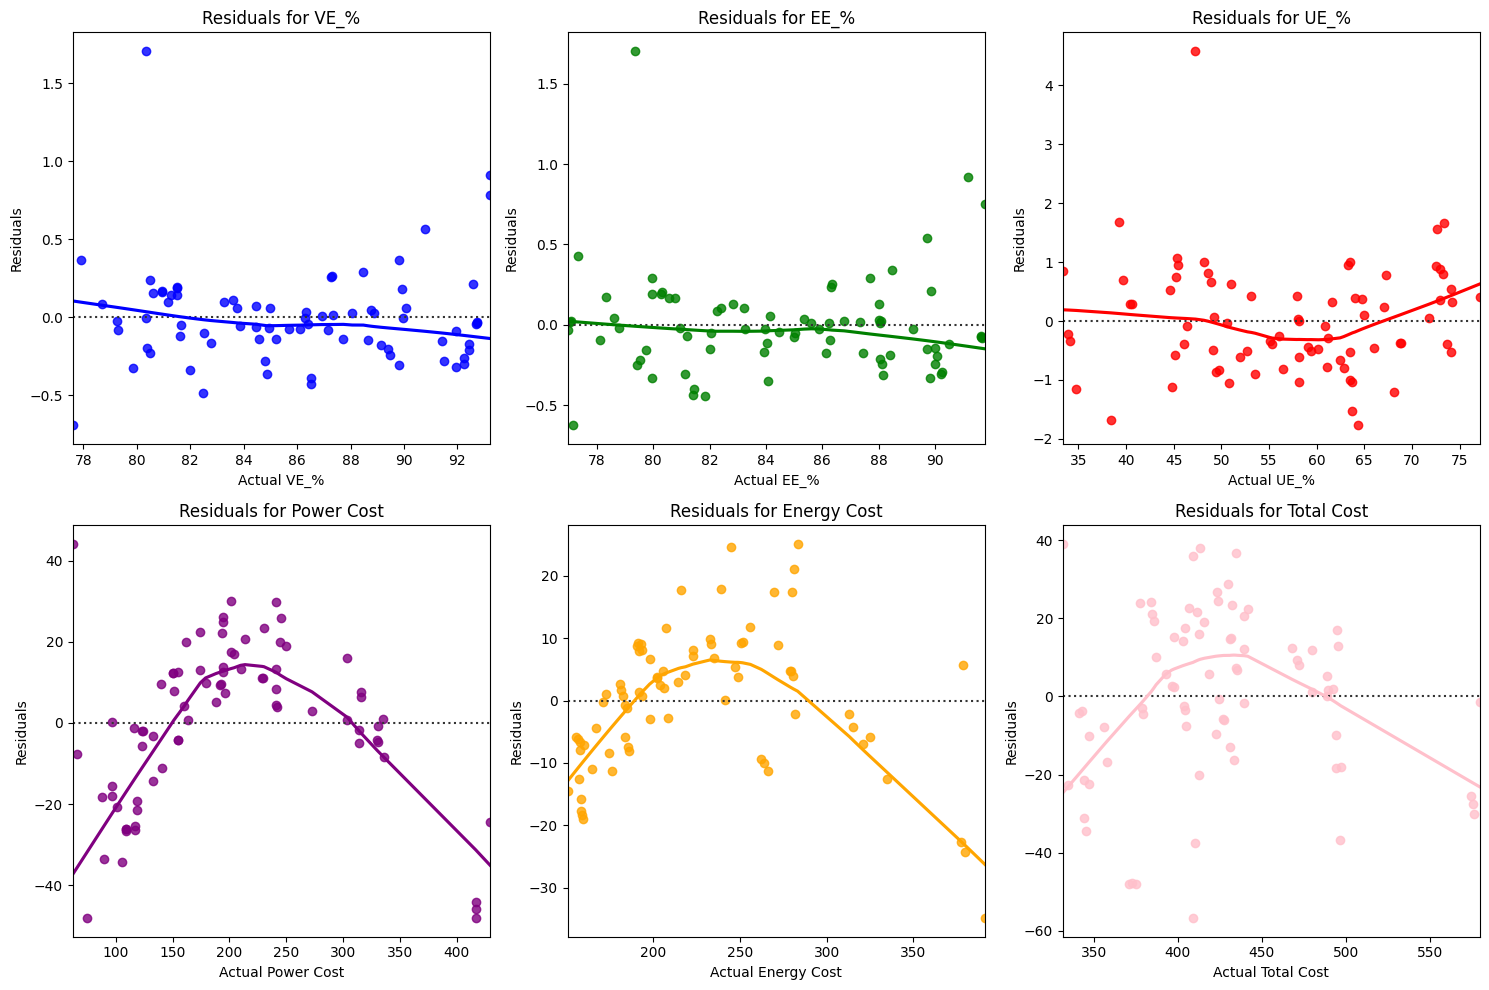

In [92]:
plt.figure(figsize=(15, 10))

# Residual plot for VE_%
plt.subplot(2, 3, 1)
sns.residplot(x=y_test['VE_%'], y=y_pred_reg_df['VE_%'], lowess=True, color='blue')
plt.title('Residuals for VE_%')
plt.xlabel('Actual VE_%')
plt.ylabel('Residuals')

# Residual plot for EE_%
plt.subplot(2, 3, 2)
sns.residplot(x=y_test['EE_%'], y=y_pred_reg_df['EE_%'], lowess=True, color='green')
plt.title('Residuals for EE_%')
plt.xlabel('Actual EE_%')
plt.ylabel('Residuals')

# Residual plot for UE_%
plt.subplot(2, 3, 3)
sns.residplot(x=y_test['UE_%'], y=y_pred_reg_df['UE_%'], lowess=True, color='red')
plt.title('Residuals for UE_%')
plt.xlabel('Actual UE_%')
plt.ylabel('Residuals')

# Residual plot for Power Cost
plt.subplot(2, 3, 4)
sns.residplot(x=y_test['power_cost_$'], y=y_pred_reg_df['power_cost_$'], lowess=True, color='purple')
plt.title('Residuals for Power Cost')
plt.xlabel('Actual Power Cost')
plt.ylabel('Residuals')

# Residual plot for Energy Cost
plt.subplot(2, 3, 5)
sns.residplot(x=y_test['energy cost_$'], y=y_pred_reg_df['energy cost_$'], lowess=True, color='orange')
plt.title('Residuals for Energy Cost')
plt.xlabel('Actual Energy Cost')
plt.ylabel('Residuals')

# Residual plot for Total Cost
plt.subplot(2, 3, 6)
sns.residplot(x=y_test['total_cost_$'], y=y_pred_reg_df['total_cost_$'], lowess=True, color='pink')
plt.title('Residuals for Total Cost')
plt.xlabel('Actual Total Cost')
plt.ylabel('Residuals')

# Adjust the layout to avoid overlapping plots
plt.tight_layout()

# Show the plots
plt.show()

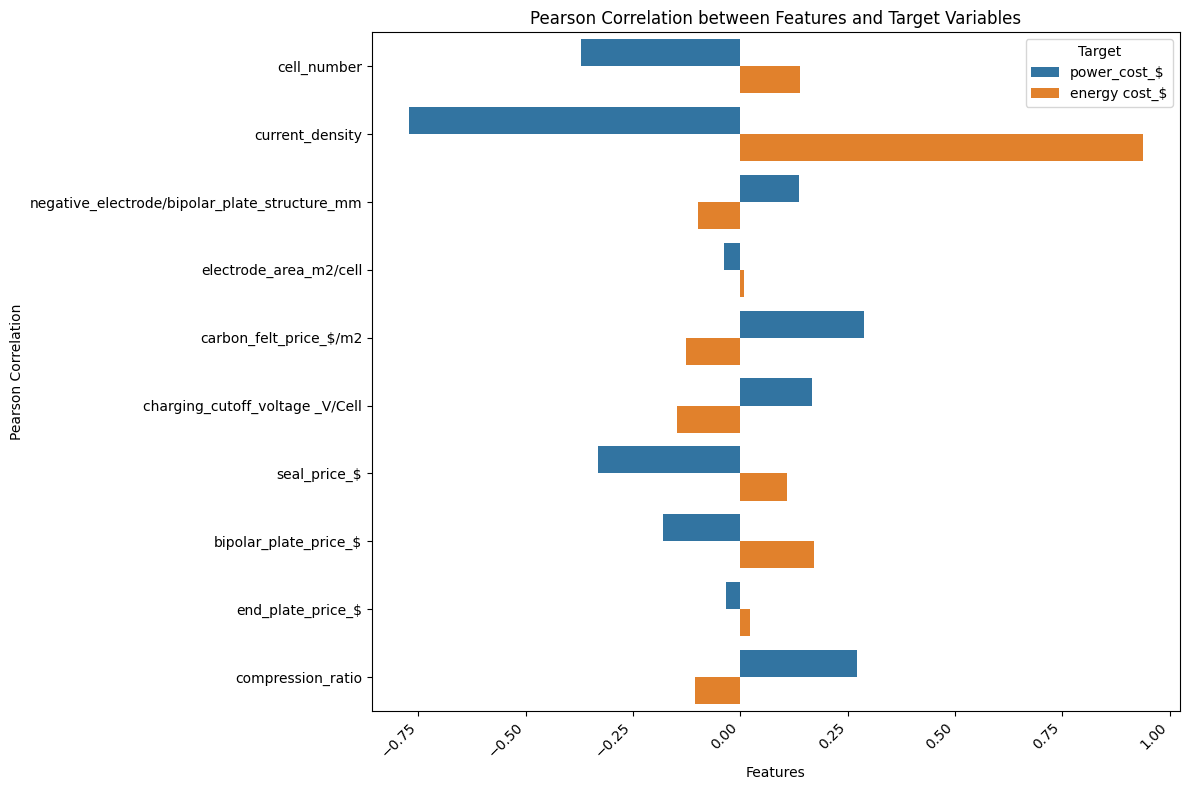

In [93]:
correlation_matrix = new_db.corr()

# Extract correlations between features and the target columns (e.g., VE_%, EE_%, etc.)
target_columns = ['power_cost_$', 'energy cost_$']  # Replace with your actual target columns
feature_columns = ['cell_number', 'current_density', 'negative_electrode/bipolar_plate_structure_mm', 'electrode_area_m2/cell', 'carbon_felt_price_$/m2', 'charging_cutoff_voltage _V/Cell', 'seal_price_$', 'bipolar_plate_price_$', 'end_plate_price_$', 'compression_ratio']  # Assuming other columns are features

# Create an empty dictionary to store correlation values
correlations = {}

# Loop through each target column and compute its correlation with each feature
for target in target_columns:
    for feature in feature_columns:
        correlations[(feature, target)] = correlation_matrix.loc[feature, target]

# Convert the dictionary to a DataFrame for easier plotting
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature-Target', 'Correlation'])
correlation_df['Feature'] = correlation_df['Feature-Target'].apply(lambda x: x[0])
correlation_df['Target'] = correlation_df['Feature-Target'].apply(lambda x: x[1])

# Plot the bar graph using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Correlation', y='Feature', hue='Target', data=correlation_df)

# Add labels and title
plt.title('Pearson Correlation between Features and Target Variables')
plt.xlabel('Features')
plt.ylabel('Pearson Correlation')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

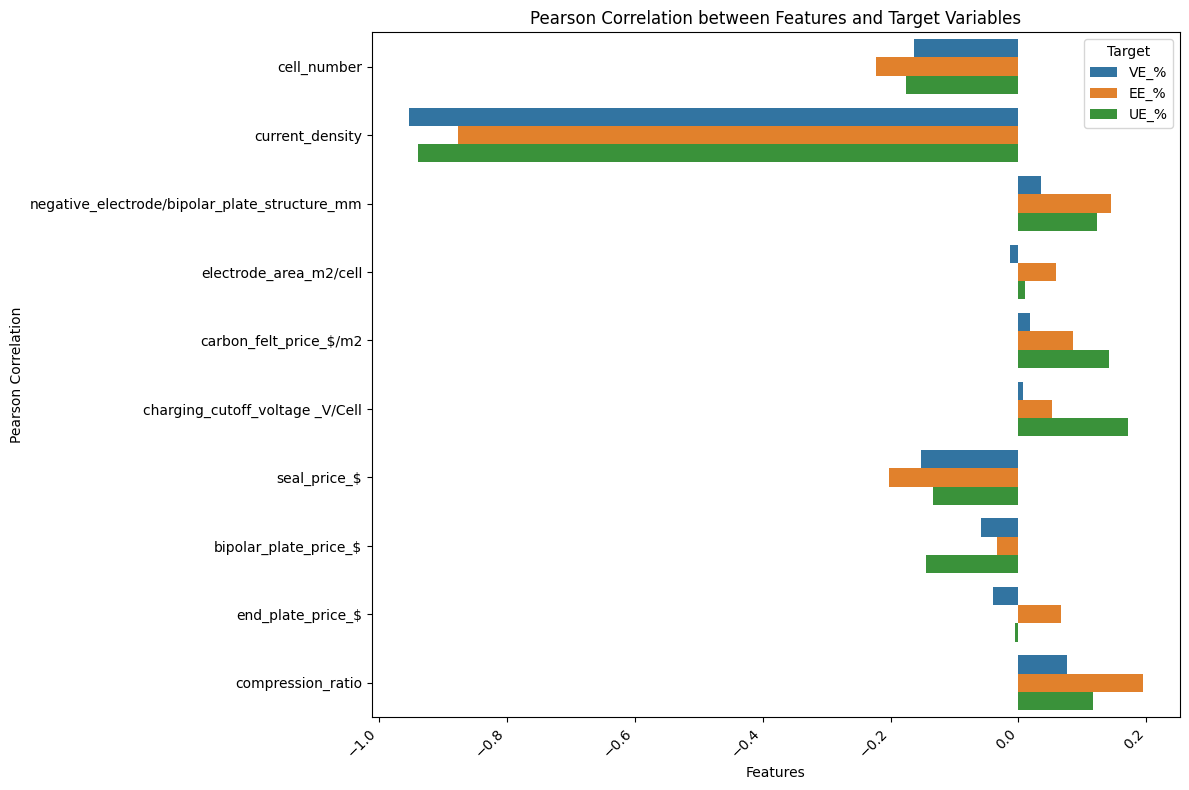

In [94]:
correlation_matrix = new_db.corr()

# Extract correlations between features and the target columns (e.g., VE_%, EE_%, etc.)
target_columns = ['VE_%', 'EE_%', 'UE_%']  # Replace with your actual target columns
feature_columns = ['cell_number', 'current_density', 'negative_electrode/bipolar_plate_structure_mm', 'electrode_area_m2/cell', 'carbon_felt_price_$/m2', 'charging_cutoff_voltage _V/Cell', 'seal_price_$', 'bipolar_plate_price_$', 'end_plate_price_$', 'compression_ratio']  # Assuming other columns are features

# Create an empty dictionary to store correlation values
correlations = {}

# Loop through each target column and compute its correlation with each feature
for target in target_columns:
    for feature in feature_columns:
        correlations[(feature, target)] = correlation_matrix.loc[feature, target]

# Convert the dictionary to a DataFrame for easier plotting
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature-Target', 'Correlation'])
correlation_df['Feature'] = correlation_df['Feature-Target'].apply(lambda x: x[0])
correlation_df['Target'] = correlation_df['Feature-Target'].apply(lambda x: x[1])

# Plot the bar graph using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Correlation', y='Feature', hue='Target', data=correlation_df)

# Add labels and title
plt.title('Pearson Correlation between Features and Target Variables')
plt.xlabel('Features')
plt.ylabel('Pearson Correlation')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

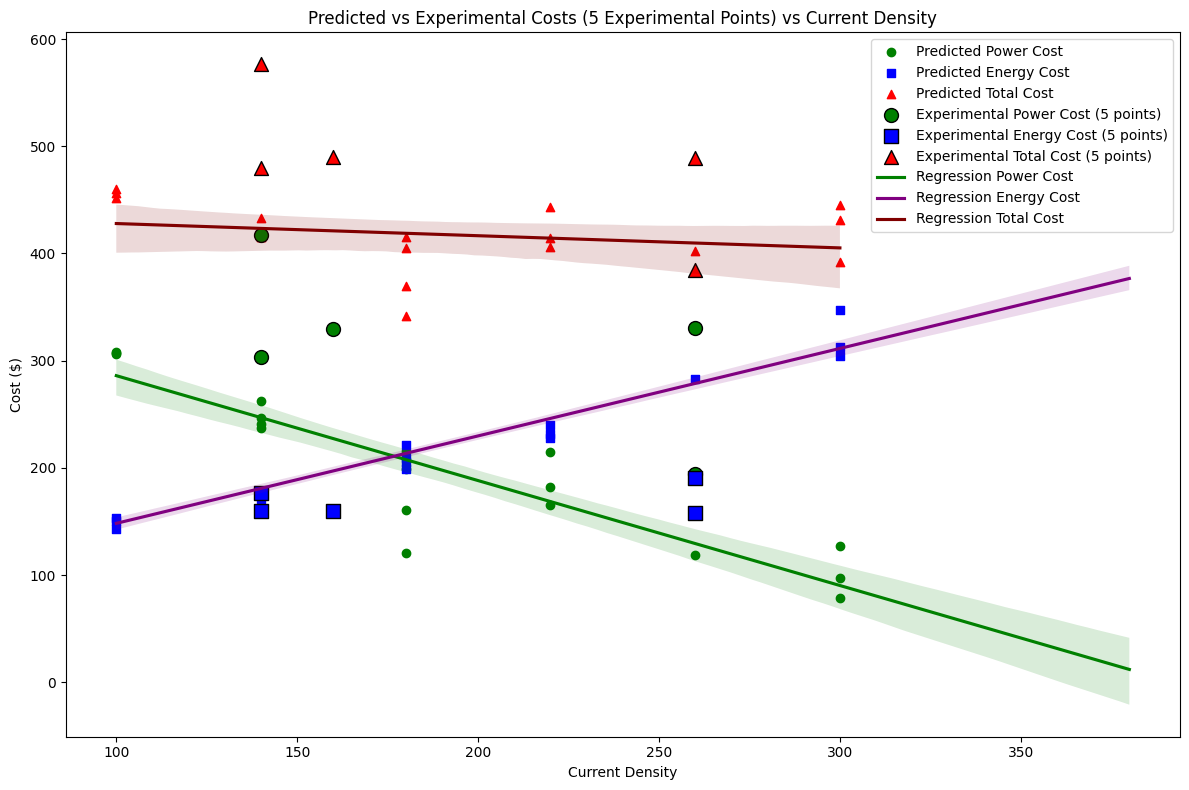

In [95]:
experiment_sample_indices = np.linspace(0, len(y_test) - 1, 5, dtype=int)
y_test_sampled = y_test.iloc[experiment_sample_indices]
current_density_sampled = new_db['current_density'].iloc[experiment_sample_indices]

# Plot both predicted and experimental data on the same plot for power cost, energy cost, and total cost
plt.figure(figsize=(12, 8))

# Predicted Power Cost vs Current Density
plt.scatter(X_test['current_density'][6:24], y_pred_reg_df['power_cost_$'][6:24], label='Predicted Power Cost', color='green', marker='o')
plt.scatter(X_test['current_density'][6:24], y_pred_reg_df['energy cost_$'][6:24], label='Predicted Energy Cost', color='blue', marker='s')
plt.scatter(X_test['current_density'][6:24], y_pred_reg_df['total_cost_$'][6:24], label='Predicted Total Cost', color='red', marker='^')

# Experimental Power Cost vs Current Density (5 points)
plt.scatter(current_density_sampled, y_test_sampled['power_cost_$'], label='Experimental Power Cost (5 points)', color='green', edgecolor='black', marker='o', s=100)
plt.scatter(current_density_sampled, y_test_sampled['energy cost_$'], label='Experimental Energy Cost (5 points)', color='blue', edgecolor='black', marker='s', s=100)
plt.scatter(current_density_sampled, y_test_sampled['total_cost_$'], label='Experimental Total Cost (5 points)', color='red', edgecolor='black', marker='^', s=100)

sns.regplot(x=X_test['current_density'], y=y_pred_reg_df['power_cost_$'], scatter=False, color='green', label='Regression Power Cost')
sns.regplot(x=X_test['current_density'], y=y_pred_reg_df['energy cost_$'], scatter=False, color='purple', label='Regression Energy Cost')
sns.regplot(x=X_test['current_density'][6:24], y=y_pred_reg_df['total_cost_$'][6:24], scatter=False, color='maroon', label='Regression Total Cost')

# Add labels and title
plt.xlabel('Current Density')
plt.ylabel('Cost ($)')
plt.title('Predicted vs Experimental Costs (5 Experimental Points) vs Current Density')


# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

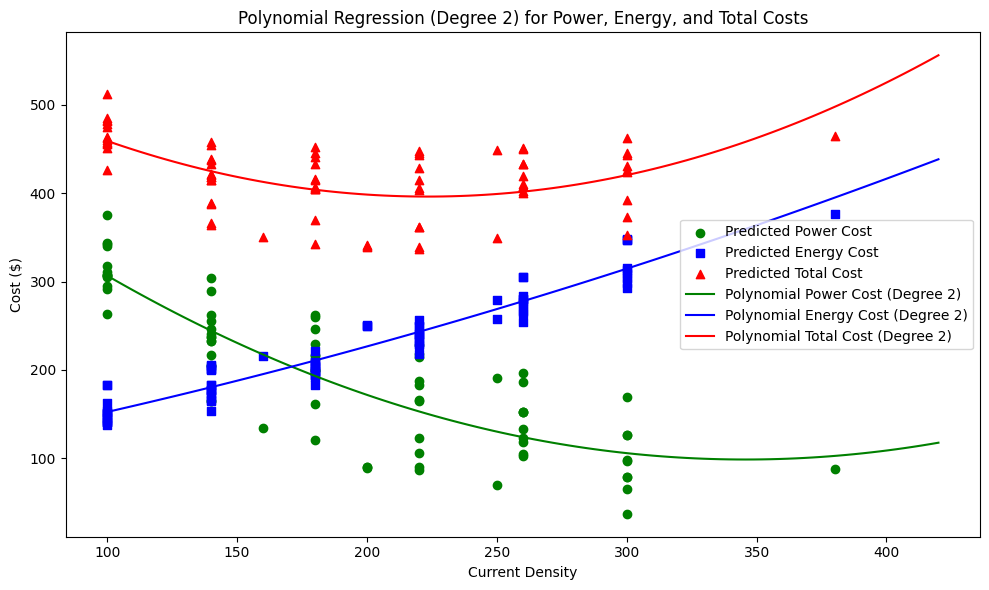

In [96]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Polynomial degree
degree = 2  # You can adjust this degree for higher polynomials

# Prepare polynomial features
poly = PolynomialFeatures(degree=degree)

# Reshape current density to be a 2D array for sklearn
X = X_test['current_density'].values.reshape(-1, 1)

# Transform current density to polynomial features
X_poly = poly.fit_transform(X)

# Fit a polynomial regression model for Power Cost, Energy Cost, and Total Cost
poly_reg_power = LinearRegression().fit(X_poly, y_pred_reg_df['power_cost_$'])
poly_reg_energy = LinearRegression().fit(X_poly, y_pred_reg_df['energy cost_$'])
poly_reg_total = LinearRegression().fit(X_poly, y_pred_reg_df['total_cost_$'])

# Create a smooth range of current densities for plotting the polynomial curve
X_range = np.linspace(X_train['current_density'].min(), X_train['current_density'].max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)

# Predict using the polynomial regression models
y_pred_power_poly = poly_reg_power.predict(X_range_poly)
y_pred_energy_poly = poly_reg_energy.predict(X_range_poly)
y_pred_total_poly = poly_reg_total.predict(X_range_poly)

# Plot the data and the polynomial regression lines
plt.figure(figsize=(10, 6))

plt.scatter(X_test['current_density'], y_pred_reg_df['power_cost_$'], label='Predicted Power Cost', color='green', marker='o')
plt.scatter(X_test['current_density'], y_pred_reg_df['energy cost_$'], label='Predicted Energy Cost', color='blue', marker='s')
plt.scatter(X_test['current_density'], y_pred_reg_df['total_cost_$'], label='Predicted Total Cost', color='red', marker='^')

# Plot the polynomial regression lines
plt.plot(X_range, y_pred_power_poly, color='green', label=f'Polynomial Power Cost (Degree {degree})')
plt.plot(X_range, y_pred_energy_poly, color='blue', label=f'Polynomial Energy Cost (Degree {degree})')
plt.plot(X_range, y_pred_total_poly, color='red', label=f'Polynomial Total Cost (Degree {degree})')

# Add labels and title
plt.xlabel('Current Density')
plt.ylabel('Cost ($)')
plt.title(f'Polynomial Regression (Degree {degree}) for Power, Energy, and Total Costs')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

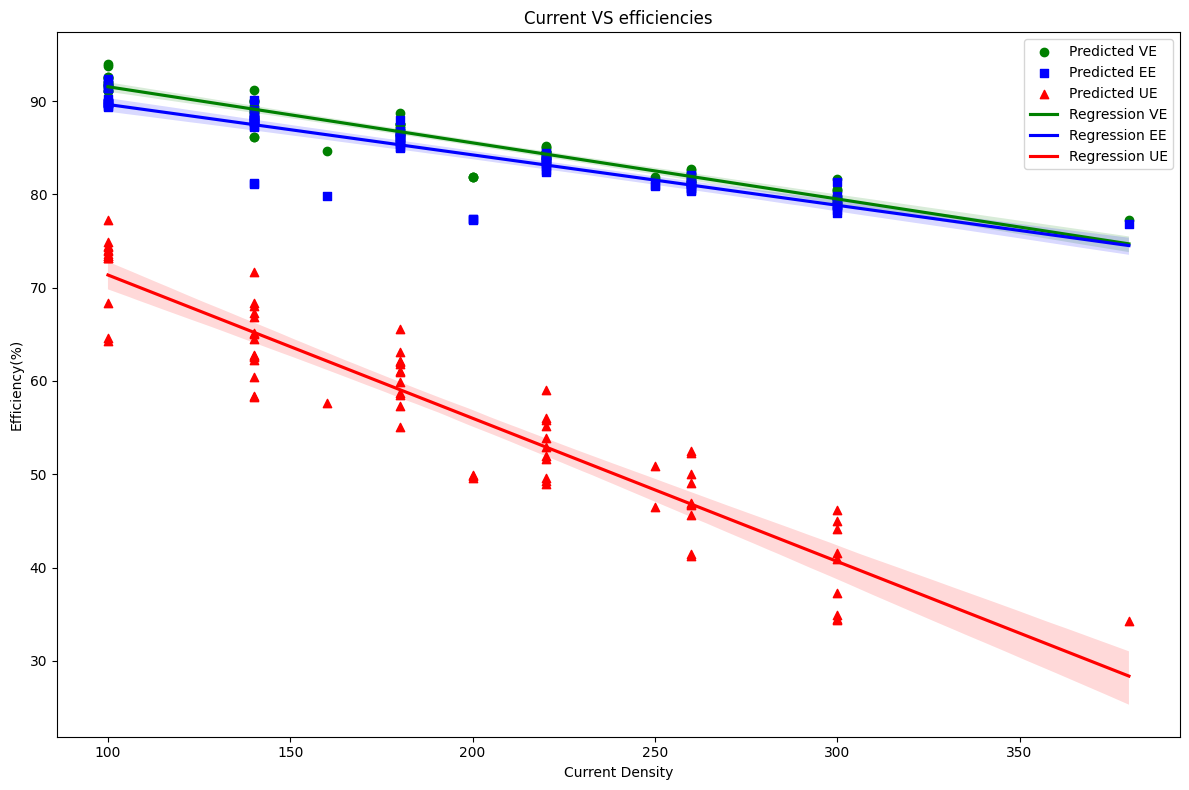

In [97]:
# Plot both predicted and experimental data on the same plot for power cost, energy cost, and total cost
plt.figure(figsize=(12, 8))

# Predicted Power Cost vs Current Density
plt.scatter(X_test['current_density'], y_pred_reg_df['VE_%'], label='Predicted VE', color='green', marker='o')
plt.scatter(X_test['current_density'], y_pred_reg_df['EE_%'], label='Predicted EE', color='blue', marker='s')
plt.scatter(X_test['current_density'], y_pred_reg_df['UE_%'], label='Predicted UE', color='red', marker='^')


sns.regplot(x=X_test['current_density'], y=y_pred_reg_df['VE_%'], scatter=False, color='green', label='Regression VE')
sns.regplot(x=X_test['current_density'], y=y_pred_reg_df['EE_%'], scatter=False, color='blue', label='Regression EE')
sns.regplot(x=X_test['current_density'], y=y_pred_reg_df['UE_%'], scatter=False, color='red', label='Regression UE')

# Add labels and title
plt.xlabel('Current Density')
plt.ylabel('Efficiency(%)')
plt.title('Current VS efficiencies')


# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [98]:
cell_30 = new_db[new_db['cell_number'] == 30]
cell_10 = new_db[new_db['cell_number'] == 10]
cell_5 = new_db[new_db['cell_number'] == 5]

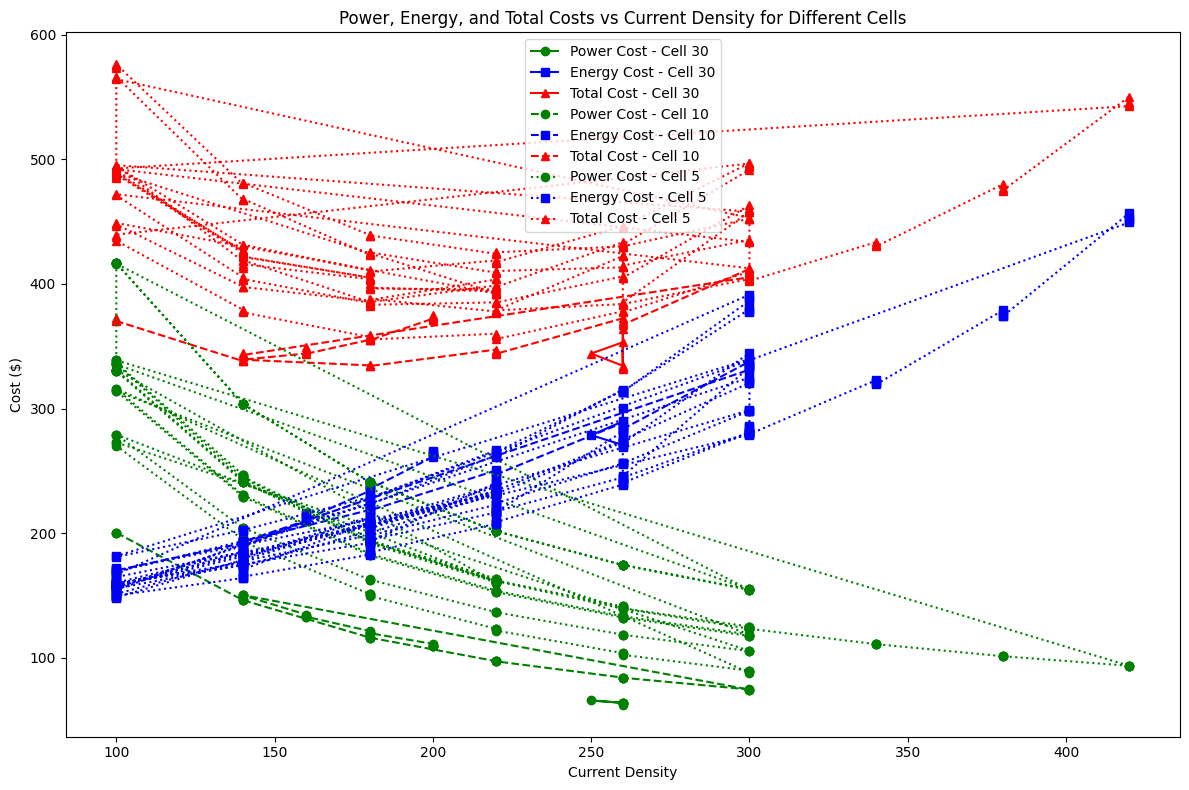

In [99]:
# Plot Power Cost (P cost), Energy Cost (E cost), and Total Cost (S cost) vs Current Density for each cell number
plt.figure(figsize=(12, 8))

# Plot for Cell 30
plt.plot(cell_30['current_density'], cell_30['power_cost_$'], label='Power Cost - Cell 30', color='green', marker='o')
plt.plot(cell_30['current_density'], cell_30['energy cost_$'], label='Energy Cost - Cell 30', color='blue', marker='s')
plt.plot(cell_30['current_density'], cell_30['total_cost_$'], label='Total Cost - Cell 30', color='red', marker='^')

# Plot for Cell 10
plt.plot(cell_10['current_density'], cell_10['power_cost_$'], label='Power Cost - Cell 10', color='green', linestyle='--', marker='o')
plt.plot(cell_10['current_density'], cell_10['energy cost_$'], label='Energy Cost - Cell 10', color='blue', linestyle='--', marker='s')
plt.plot(cell_10['current_density'], cell_10['total_cost_$'], label='Total Cost - Cell 10', color='red', linestyle='--', marker='^')

# Plot for Cell 5
plt.plot(cell_5['current_density'], cell_5['power_cost_$'], label='Power Cost - Cell 5', color='green', linestyle=':', marker='o')
plt.plot(cell_5['current_density'], cell_5['energy cost_$'], label='Energy Cost - Cell 5', color='blue', linestyle=':', marker='s')
plt.plot(cell_5['current_density'], cell_5['total_cost_$'], label='Total Cost - Cell 5', color='red', linestyle=':', marker='^')

# Add labels and title
plt.xlabel('Current Density')
plt.ylabel('Cost ($)')
plt.title('Power, Energy, and Total Costs vs Current Density for Different Cells')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

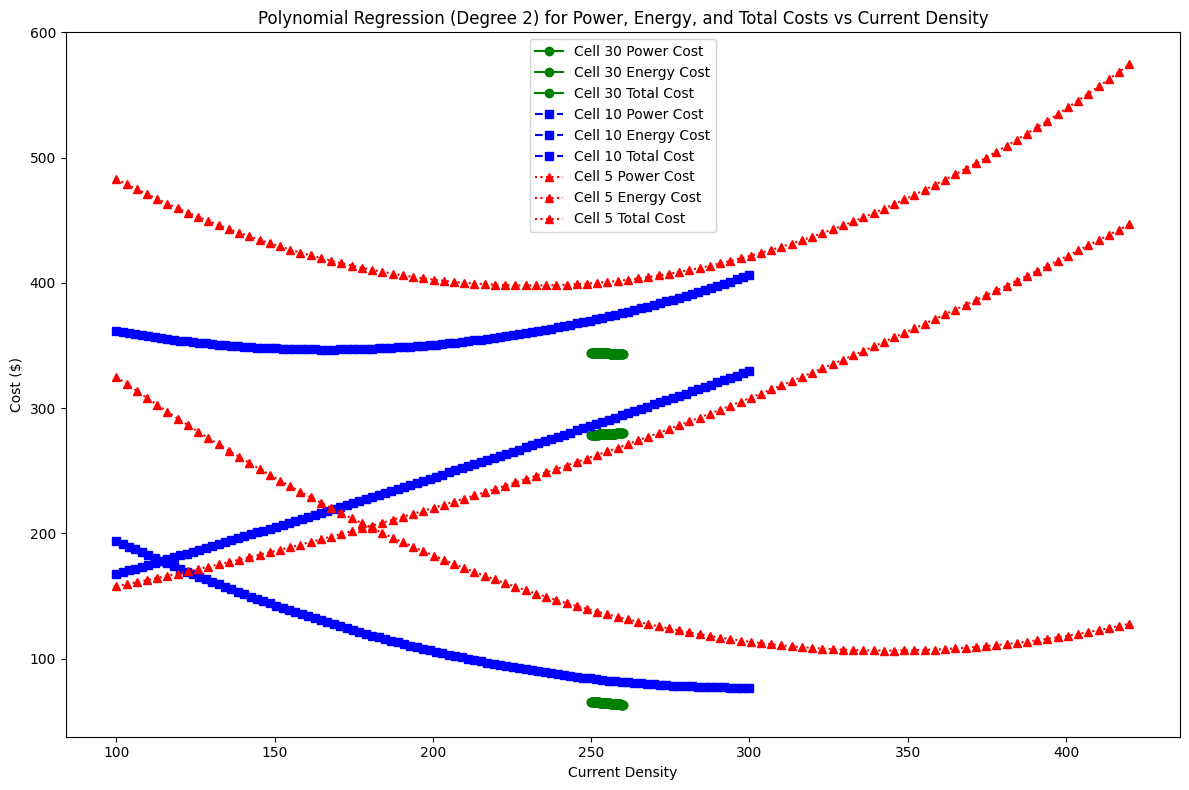

In [100]:
  def plot_polynomial_fit(cell_data, label_prefix, color, linestyle, marker):
    # Extract current density and cost data
    X = cell_data['current_density'].values.reshape(-1, 1)

    # Power Cost Polynomial Fit
    y_power = cell_data['power_cost_$'].values
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    poly_reg_power = LinearRegression().fit(X_poly, y_power)
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_pred_power_poly = poly_reg_power.predict(X_range_poly)

    # Energy Cost Polynomial Fit
    y_energy = cell_data['energy cost_$'].values
    poly_reg_energy = LinearRegression().fit(X_poly, y_energy)
    y_pred_energy_poly = poly_reg_energy.predict(X_range_poly)

    # Total Cost Polynomial Fit (Power + Energy)
    y_total = y_power + y_energy
    poly_reg_total = LinearRegression().fit(X_poly, y_total)
    y_pred_total_poly = poly_reg_total.predict(X_range_poly)

    # Plot the polynomial fits
    plt.plot(X_range, y_pred_power_poly, color=color, linestyle=linestyle, label=f'{label_prefix} Power Cost', marker=marker)
    plt.plot(X_range, y_pred_energy_poly, color=color, linestyle=linestyle, label=f'{label_prefix} Energy Cost', marker=marker)
    plt.plot(X_range, y_pred_total_poly, color=color, linestyle=linestyle, label=f'{label_prefix} Total Cost', marker=marker)


# Filter the dataset for each cell number
cell_30 = new_db[new_db['cell_number'] == 30]
cell_10 = new_db[new_db['cell_number'] == 10]
cell_5 = new_db[new_db['cell_number'] == 5]

# Plot the data
plt.figure(figsize=(12, 8))

# Plot polynomial fits for Cell 30
plot_polynomial_fit(cell_30, 'Cell 30', color='green', linestyle='-', marker='o')

# Plot polynomial fits for Cell 10
plot_polynomial_fit(cell_10, 'Cell 10', color='blue', linestyle='--', marker='s')

# Plot polynomial fits for Cell 5
plot_polynomial_fit(cell_5, 'Cell 5', color='red', linestyle=':', marker='^')

# Add labels and title
plt.xlabel('Current Density')
plt.ylabel('Cost ($)')
plt.title('Polynomial Regression (Degree 2) for Power, Energy, and Total Costs vs Current Density')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()